# Project 4, APS1070 Summer 2022
#### **Linear Regression -  15 points**
**Deadline: August 13th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Jashwant Raj Gunaseelan
*   Your **student number**: 1007923712



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



In [27]:
%%shell
jupyter nbconvert --to html /content/S22_APS1070_Project_4.ipynb

[NbConvertApp] Converting notebook /content/S22_APS1070_Project_4.ipynb to html
[NbConvertApp] Writing 1012451 bytes to /content/S22_APS1070_Project_4.html


## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [2]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [3]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import scipy

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=1-0.70,random_state=1)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test,Y_test,test_size=0.5,random_state=1)

scaler=StandardScaler()
scaler.fit(X_train)
X_std_train=scaler.transform(X_train)
X_std_test=scaler.transform(X_test)
X_std_valid=scaler.transform(X_valid)

print("Before adding column of 1's",X_std_train.shape,X_std_valid.shape,X_std_test.shape)

X_std_train=np.insert(X_std_train,0,np.ones(X_std_train.shape[0]),axis=1)
X_std_test=np.insert(X_std_test,0,np.ones(X_std_test.shape[0]),axis=1)
X_std_valid=np.insert(X_std_valid,0,np.ones(X_std_valid.shape[0]),axis=1)

print("After adding column of 1's",X_std_train.shape,X_std_valid.shape,X_std_test.shape)

Before adding column of 1's (9624, 40) (2063, 40) (2063, 40)
After adding column of 1's (9624, 41) (2063, 41) (2063, 41)


# **Epoch is when we go through all the samples in the dataset and an iteration is when a weight has been updated.**
# **In mini-batch gradient descent the dataset is divided into different batches and each batch has its own weight which gets updated in the consequent batches, hence each time the weight is updated it is considered as a new iteration. We need more than 1 iteration to cover the whole dataset so we consider an epoch to have more than one iteration. So a Epoch is when we cover all the batches of the dataset**
# **In stochastic gradient descent we consider every sample as a mini batch so the number of iterations increase and it is considered one epoch when we go through all the samples of the dataset.**

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [4]:
### YOUR CODE HERE ###
def Calculate_direct_solution(X_train,Y_train,X_valid,Y_valid):
  W=np.dot(scipy.linalg.inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,Y_train))
  Y_train_Pred=np.dot(X_train,W)
  Y_valid_Pred=np.dot(X_valid,W)
  RMSE_train=mean_squared_error(Y_train,Y_train_Pred,squared=False)
  RMSE_valid=mean_squared_error(Y_valid,Y_valid_Pred,squared=False)
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)
  return (W,Y_train_Pred,Y_valid_Pred,RMSE_train,RMSE_valid)

Weights,Y_train_Predicted,Y_valid_Predicted,RMSE_Train,RMSE_Validation = Calculate_direct_solution(X_std_train,Y_train,X_std_valid,Y_valid)

RMSE on training set:  0.00017524626901630437
RMSE on validation set:  0.0001701602339552317


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [5]:
import time
def Grad_Descent(X_train,Y_train,X_valid,Y_valid):
  start_time = time.time() ## Records current time

  WEIGHTS=np.random.uniform(high=0.001,size=41)
  LR=0.01
  rmse_train_array=[]
  rmse_valid_array=[]

  ## GD Script -- Sample code in tutorial! ##
  Epoch=1
  Y_T_Predicted=np.dot(X_train,WEIGHTS.T)
  Y_V_Predicted=np.dot(X_valid,WEIGHTS.T)
  RMSE_Train_GD=mean_squared_error(Y_train,Y_T_Predicted,squared=False)
  RMSE_Valid_GD=mean_squared_error(Y_valid,Y_V_Predicted,squared=False)
  rmse_train_array.append(RMSE_Train_GD)
  rmse_valid_array.append(RMSE_Valid_GD)
  while RMSE_Valid_GD > (1.001*RMSE_Validation):
    Gradient=(1/len(X_train)*np.dot(X_train.T,Y_T_Predicted-Y_train.values))
    WEIGHTS=WEIGHTS - LR*Gradient
    Y_T_Predicted=np.dot(X_train,WEIGHTS.T)
    Y_V_Predicted=np.dot(X_valid,WEIGHTS.T)
    RMSE_Train_GD=mean_squared_error(Y_train,Y_T_Predicted,squared=False)
    RMSE_Valid_GD=mean_squared_error(Y_valid,Y_V_Predicted,squared=False)
    rmse_train_array.append(RMSE_Train_GD)
    rmse_valid_array.append(RMSE_Valid_GD)
    Epoch += 1
  print(f"It takes {Epoch} epochs to reach the convergence criteria")

  print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
  return Epoch,rmse_train_array,rmse_valid_array,WEIGHTS

In [6]:
Epochs,RMSE_Train_array,RMSE_Valid_array,Final_Weights = Grad_Descent(X_std_train,Y_train,X_std_valid,Y_valid)

It takes 11041 epochs to reach the convergence criteria
--- Total Training Time: 41.20401620864868 (s) ---


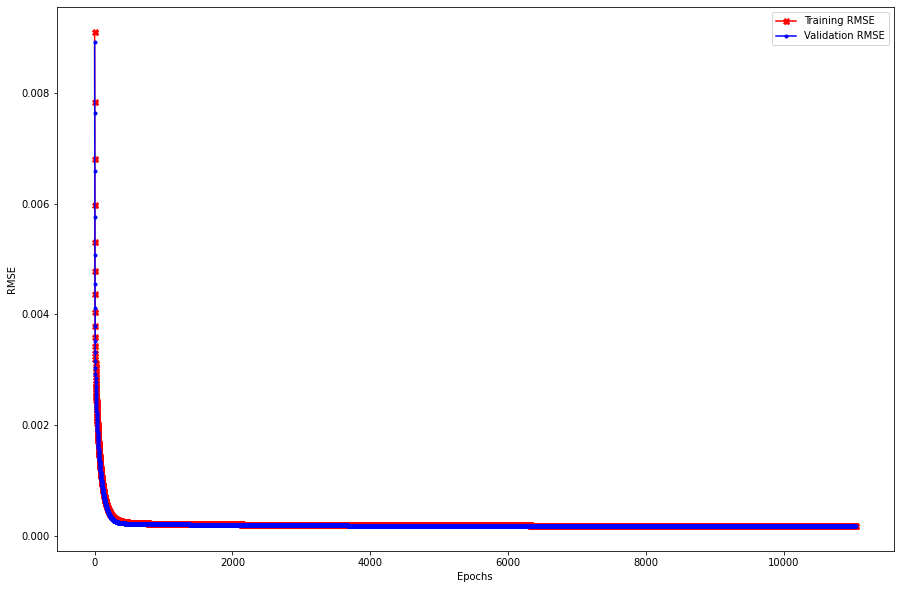

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(list(range(Epochs)),RMSE_Train_array,'r',label="Training RMSE",marker='X')
plt.plot(list(range(Epochs)),RMSE_Valid_array,'b',label="Validation RMSE",marker='.')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# **According to the above plot the training and validation RMSE are close to overlapping with each other, hence there is no way to tell whether its overfitting or underfitting.**

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [8]:
import math
def Mini_Batch_Grad_Descent(X_train,Y_train,X_valid,Y_valid,Batch_size,LR,Convergence):

  WEIGHTS=np.random.uniform(high=0.001,size=41)
  rmse_train_array=[]
  rmse_valid_array=[]
  TIME=[]

  Epoch=1
  start_time = time.time() ## Records current time
  
  #calculating start and end points
  number_of_batches=math.ceil(X_train.shape[0]/Batch_size)
  for batch in range(number_of_batches):
    if(batch == number_of_batches-1):
      temp_X=X_train[Batch_size*batch:X_train.shape[0],:]
      temp_Y=Y_train.values[Batch_size*batch:X_train.shape[0]]
      #print(f"[{Batch_size*batch}:{X_train.shape[0]},:]")
    else:
      temp_X=X_train[Batch_size*batch:(Batch_size*(batch+1)),:]
      temp_Y=Y_train.values[Batch_size*batch:(Batch_size*(batch+1))]
      #print(f"[{Batch_size*batch}:{(Batch_size*(batch+1))},:]")
    Y_T_Predicted=np.dot(temp_X,WEIGHTS.T)
    Gradient=(1/len(temp_X)*np.dot(temp_X.T,Y_T_Predicted-temp_Y))
    WEIGHTS=WEIGHTS-LR*Gradient
  Y_T_Predicted=np.dot(X_train,WEIGHTS.T)  
  Y_V_Predicted=np.dot(X_valid,WEIGHTS.T)
  RMSE_Train_GD=mean_squared_error(Y_train,Y_T_Predicted,squared=False)
  RMSE_Valid_GD=mean_squared_error(Y_valid,Y_V_Predicted,squared=False)
  rmse_train_array.append(RMSE_Train_GD)
  rmse_valid_array.append(RMSE_Valid_GD)

  #Dataset shuffle
  Temp_Train=np.insert(X_train,X_train.shape[1],Y_train.values,axis=1)
  Temp_Train=np.random.permutation(Temp_Train)
  X_train,Y_train=Temp_Train[:,:-1],Temp_Train[:,-1]

  TIME.append(time.time() - start_time)
  Non_converge_count=0

  while RMSE_Valid_GD > Convergence:
    number_of_batches=math.ceil(X_train.shape[0]/Batch_size)
    for batch in range(number_of_batches):
      if(batch == number_of_batches-1):
        temp_X=X_train[Batch_size*batch:X_train.shape[0],:]
        temp_Y=Y_train[Batch_size*batch:X_train.shape[0]]
        #print(f"[{Batch_size*batch}:{X_train.shape[0]},:]")
      else:
        temp_X=X_train[Batch_size*batch:(Batch_size*(batch+1)),:]
        temp_Y=Y_train[Batch_size*batch:(Batch_size*(batch+1))]
        #print(f"[{Batch_size*batch}:{(Batch_size*(batch+1))},:]")
      Y_T_Predicted=np.dot(temp_X,WEIGHTS.T)
      Gradient=(1/len(temp_X)*np.dot(temp_X.T,Y_T_Predicted-temp_Y))
      WEIGHTS=WEIGHTS-LR*Gradient
    Y_T_Predicted=np.dot(X_train,WEIGHTS.T)  
    Y_V_Predicted=np.dot(X_valid,WEIGHTS.T)
    RMSE_Train_GD=mean_squared_error(Y_train,Y_T_Predicted,squared=False)
    RMSE_Valid_GD=mean_squared_error(Y_valid,Y_V_Predicted,squared=False)
    rmse_train_array.append(RMSE_Train_GD)
    rmse_valid_array.append(RMSE_Valid_GD)
    #print(Epoch)
    Epoch += 1
    if(len(rmse_valid_array)>5):
      #non convergence check 
      if(RMSE_Valid_GD > rmse_valid_array[-2] and RMSE_Valid_GD > rmse_valid_array[-3] and RMSE_Valid_GD > rmse_valid_array[-4] and RMSE_Valid_GD > rmse_valid_array[-5]):
        Non_converge_count+=1
      else:
        Non_converge_count=0
        pass
      
      if Non_converge_count>15:
        break

    #Dataset shuffle
    Temp_Train=np.insert(X_train,X_train.shape[1],Y_train,axis=1)
    Temp_Train=np.random.permutation(Temp_Train)
    X_train,Y_train=Temp_Train[:,:-1],Temp_Train[:,-1]
    TIME.append(time.time() - start_time)

  print(f"It takes {Epoch} epochs to reach the convergence criteria and the RMSE is {RMSE_Valid_GD}")
  
  return rmse_train_array,rmse_valid_array,TIME,WEIGHTS

It takes 21 epochs to reach the convergence criteria and the RMSE is 3.424945371429979e+82
It takes 25 epochs to reach the convergence criteria and the RMSE is 1.8832299368055945e+65
It takes 23 epochs to reach the convergence criteria and the RMSE is 1.344233679971934e+39
It takes 45 epochs to reach the convergence criteria and the RMSE is 2.343160156213572e+37
It takes 426 epochs to reach the convergence criteria and the RMSE is 0.00017027206811957147
It takes 6114 epochs to reach the convergence criteria and the RMSE is 0.000170328276027522
It takes 2565 epochs to reach the convergence criteria and the RMSE is 0.0001703278711210254
It takes 54409 epochs to reach the convergence criteria and the RMSE is 0.0001703274356470293
It takes 68053 epochs to reach the convergence criteria and the RMSE is 0.00017032386168283351


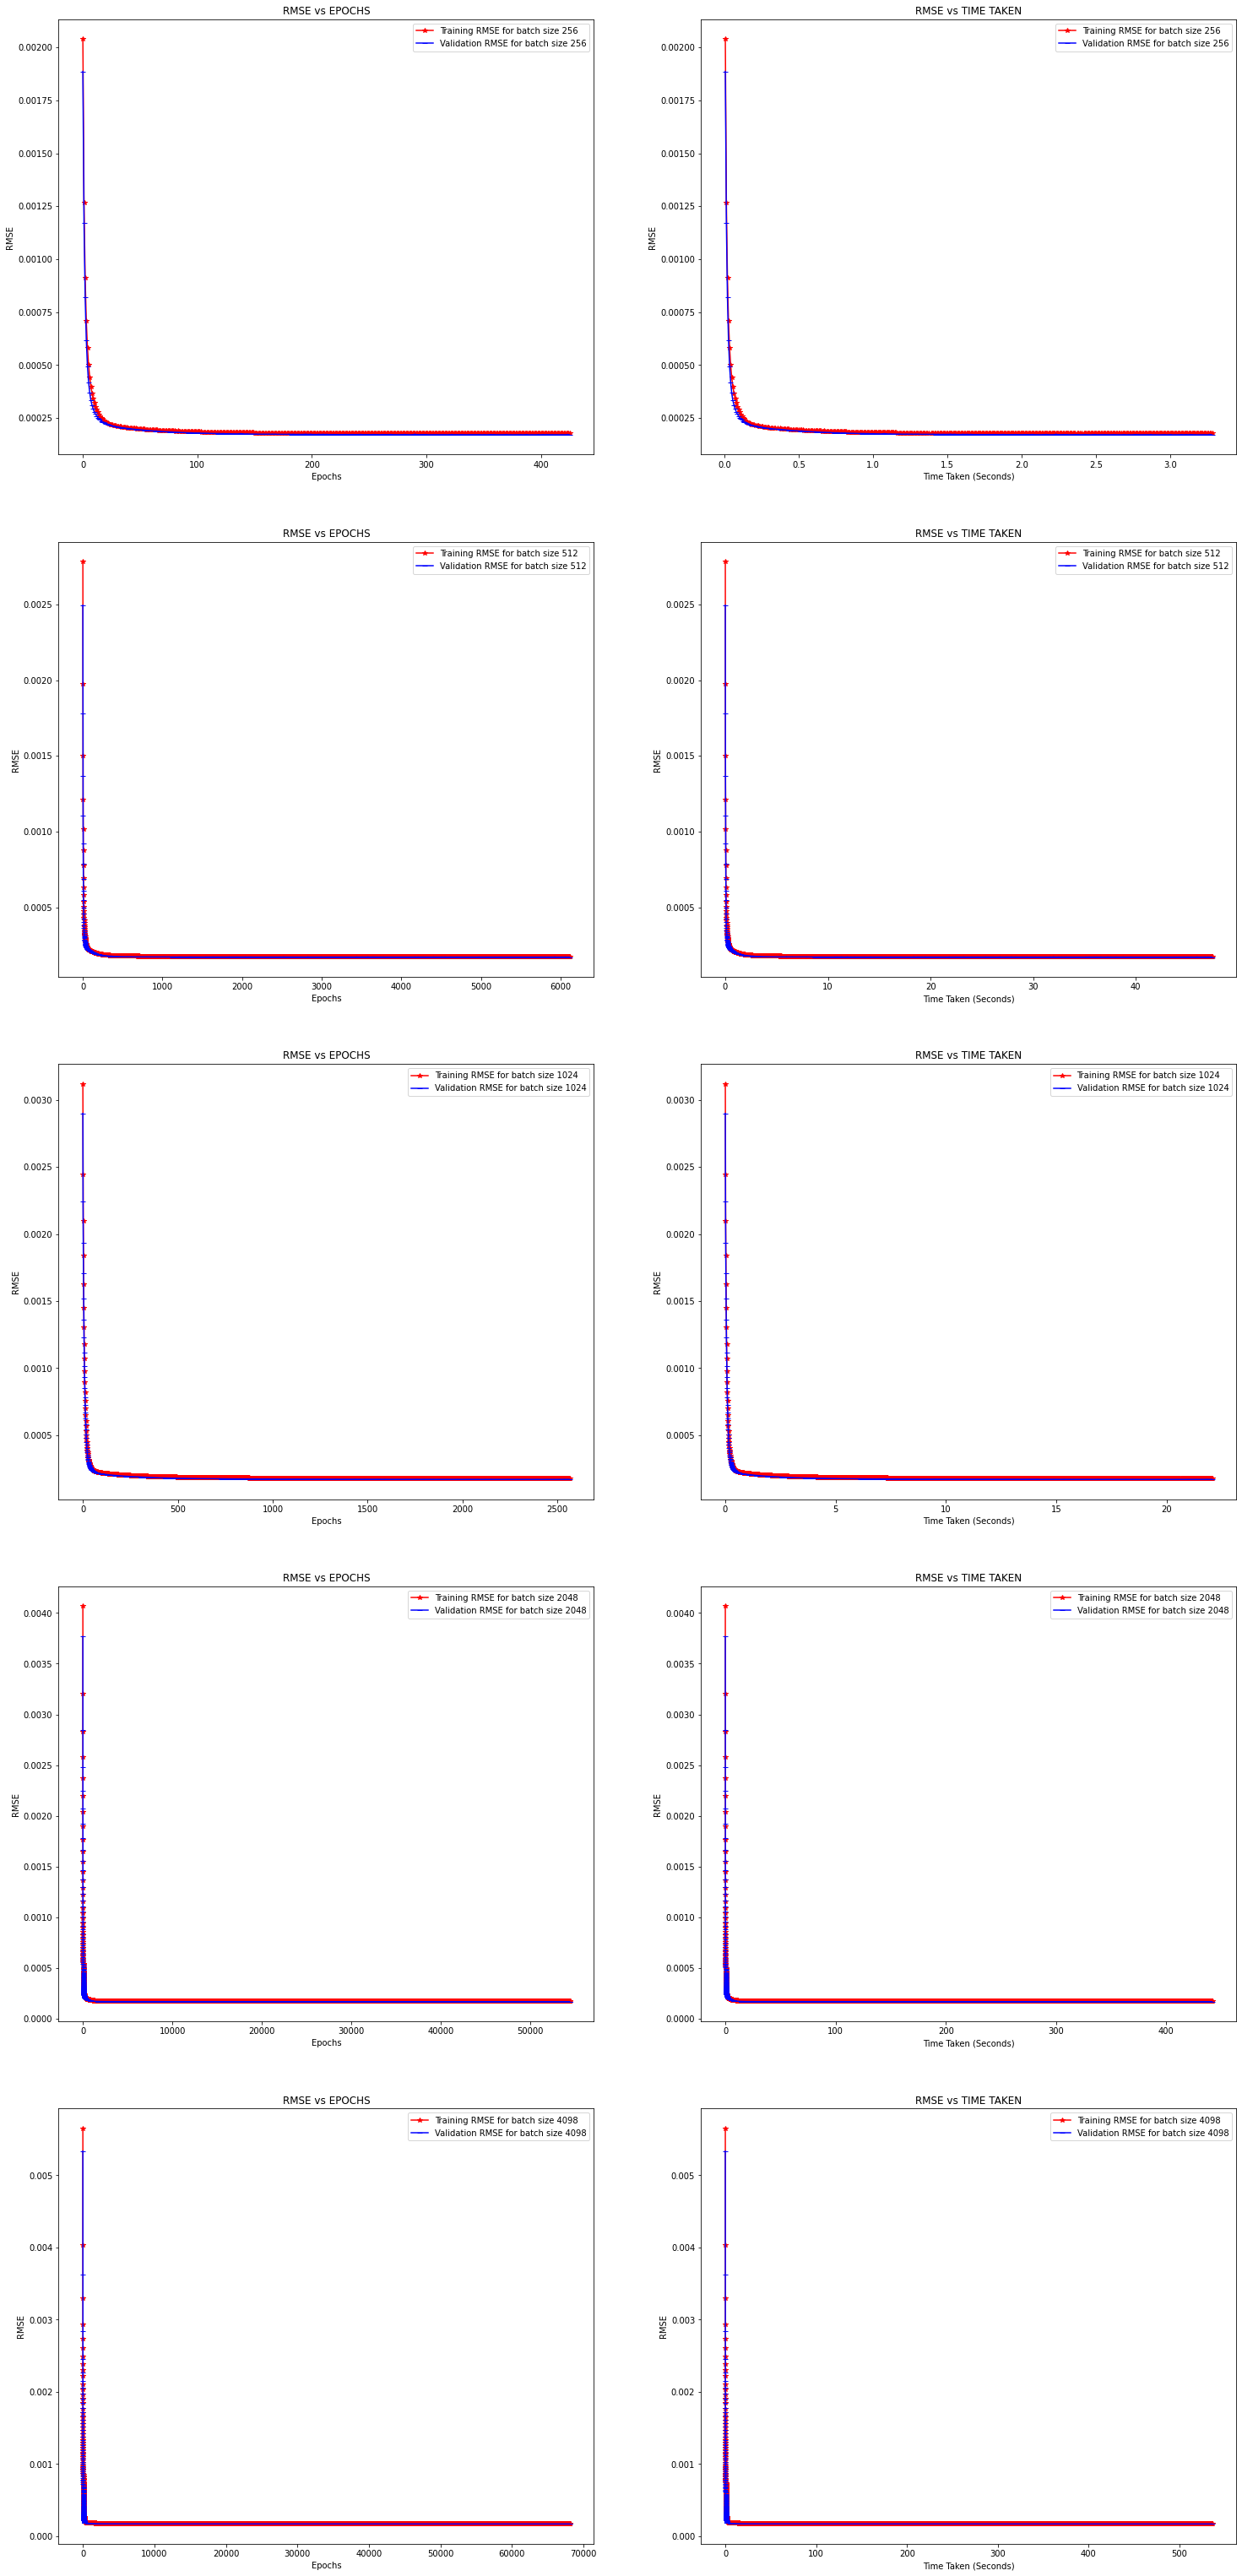

In [9]:
TR_RMSE={}
VL_RMSE={}
WEH={}
TIME={}
get_batches,total_time=[],[]
for batch_size in [2,4,8,16,256,512,1024,2048,4098]:
  Train_RMSE_MBGD,Validation_RMSE_MBGD,TIME_DURATION,Final_WEIGHTS=Mini_Batch_Grad_Descent(X_std_train,Y_train,X_std_valid,Y_valid,batch_size,0.01,1.001*RMSE_Validation)
  TR_RMSE[str(batch_size)]=Train_RMSE_MBGD
  VL_RMSE[str(batch_size)]=Validation_RMSE_MBGD
  WEH[str(batch_size)]=Final_WEIGHTS
  TIME[str(batch_size)]=TIME_DURATION
fig , axs = plt.subplots(5,2,figsize = (25,55))
index1=0
for batch in [2,4,8,16,256,512,1024,2048,4098]:
  if(VL_RMSE[str(batch)][-1]<1.001*RMSE_Validation):
    axs[index1,0].plot(TR_RMSE[str(batch)],'r',label="Training RMSE for batch size "+str(batch),marker='*')
    axs[index1,0].plot(VL_RMSE[str(batch)],'b',label="Validation RMSE for batch size "+str(batch),marker='_')
    axs[index1,0].set_xlabel("Epochs")
    axs[index1,0].set_ylabel("RMSE")
    axs[index1,0].legend()
    axs[index1,0].set_title('RMSE vs EPOCHS')
    axs[index1,1].plot(TIME[str(batch)],TR_RMSE[str(batch)],'r',label="Training RMSE for batch size "+str(batch),marker='*')
    axs[index1,1].plot(TIME[str(batch)],VL_RMSE[str(batch)],'b',label="Validation RMSE for batch size "+str(batch),marker='_')
    axs[index1,1].set_xlabel("Time Taken (Seconds)")
    axs[index1,1].set_ylabel("RMSE")
    axs[index1,1].legend()
    axs[index1,1].set_title('RMSE vs TIME TAKEN')
    get_batches.append(batch)
    total_time.append(TIME[str(batch)][-1])
    index1+=1
plt.show()

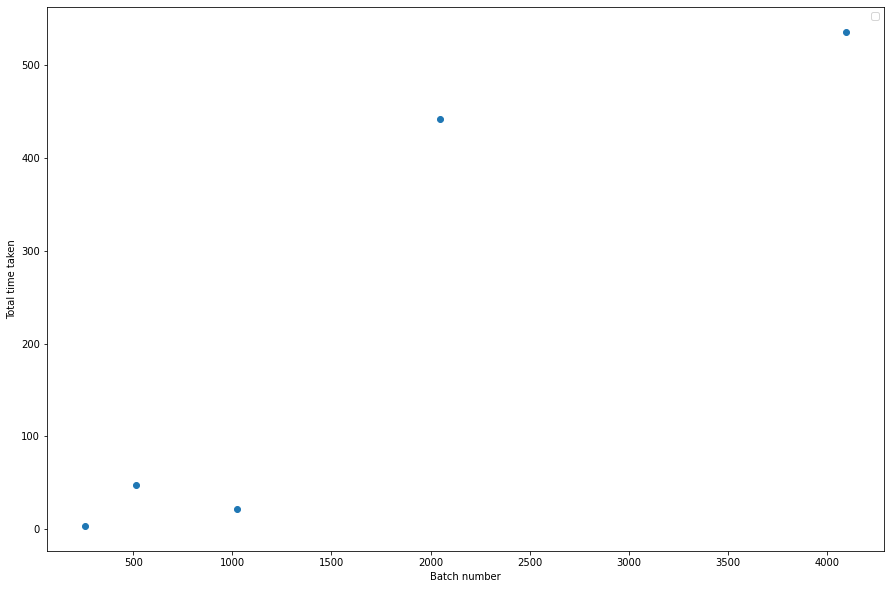

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(x=get_batches,y=total_time)
plt.xlabel("Batch number")
plt.ylabel("Total time taken")
plt.legend()
plt.show()

# **From the above set of plots we can assume that the higher the batch size the more time and the greater the number of epochs it takes for training, as the number of times it takes for the weights to update is less. In the plot for time vs batch size we see the smaller the batch the lesser the time to reach the convergence criteria. There are some odd situations but it may be due to the fact that we take random weight values initially**

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [15]:
### YOUR CODE HERE ###
DF = pd.DataFrame()
dictt={'Learning Rate':0.0001,'Batch Size':2,'Training RMSE':1.022,'Validation RMSE':1.022}
for LR in [0.0001,0.0002,0.0003]:
  print(f"Assigning LR as {LR}")
  dictt['Learning Rate']=LR
  #DF.append(dictt,ignore_index=True)
  for batch_size in [2,4,8]:
    Train_RMSE_MBGD,Validation_RMSE_MBGD,TIME_DURATION,Final_WEIGHTS=Mini_Batch_Grad_Descent(X_std_train,Y_train,X_std_valid,Y_valid,batch_size,LR,1.001*RMSE_Validation)
    dictt['Batch Size']=batch_size
    dictt['Training RMSE']=Train_RMSE_MBGD[-1]
    dictt['Validation RMSE']=Validation_RMSE_MBGD[-1]
    DF=DF.append(dictt,ignore_index=True)
DF

Assigning LR as 0.0001
It takes 236 epochs to reach the convergence criteria and the RMSE is 0.00017030382739044968
It takes 3647 epochs to reach the convergence criteria and the RMSE is 0.0001703198849073569
It takes 2069 epochs to reach the convergence criteria and the RMSE is 0.00017032447488605864
Assigning LR as 0.0002
It takes 323 epochs to reach the convergence criteria and the RMSE is 0.00017028587561120488
It takes 544 epochs to reach the convergence criteria and the RMSE is 0.00017031690965562112
It takes 1094 epochs to reach the convergence criteria and the RMSE is 0.00017026744052093311
Assigning LR as 0.0003
It takes 101 epochs to reach the convergence criteria and the RMSE is 0.0001702175262274344
It takes 1452 epochs to reach the convergence criteria and the RMSE is 0.0001703296635212257
It takes 3992 epochs to reach the convergence criteria and the RMSE is 0.00017031238676723441


,Learning Rate,Batch Size,Training RMSE,Validation RMSE
0,0.0001,2.0,0.000177,0.00017
1,0.0001,4.0,0.000175,0.00017
2,0.0001,8.0,0.000177,0.00017
3,0.0002,2.0,0.000176,0.00017
4,0.0002,4.0,0.000177,0.00017
5,0.0002,8.0,0.000178,0.00017
6,0.0003,2.0,0.000182,0.00017
7,0.0003,4.0,0.000176,0.00017
8,0.0003,8.0,0.000175,0.00017


In [24]:
Fastest_Batch=get_batches[total_time.index(min(total_time))]
Lr=[0.01,0.02,0.03,0.004,0.001,0.002,0.003,0.006,0.007,0.008]
#Lr=[0.01*x for x in range(1,11)]
TRMSE={}
VRMSE={}
TPerE={}
for LRs in Lr:
  print(f"The Lr is {LRs}")
  Train_RMSE_MBGD,Validation_RMSE_MBGD,TIME_DURATION,Final_WEIGHTS=Mini_Batch_Grad_Descent(X_std_train,Y_train,X_std_valid,Y_valid,Fastest_Batch,LRs,1.001*RMSE_Validation)
  TRMSE[str(LRs)]=Train_RMSE_MBGD
  VRMSE[str(LRs)]=Validation_RMSE_MBGD
  TPerE[str(LRs)]=TIME_DURATION

The Lr is 0.01
It takes 1067 epochs to reach the convergence criteria and the RMSE is 0.0001702852353249459
The Lr is 0.02
It takes 422 epochs to reach the convergence criteria and the RMSE is 0.00017032725937551164
The Lr is 0.03
It takes 1108 epochs to reach the convergence criteria and the RMSE is 0.00017030840710464552
The Lr is 0.004
It takes 1960 epochs to reach the convergence criteria and the RMSE is 0.00017032740016608344
The Lr is 0.001
It takes 60830 epochs to reach the convergence criteria and the RMSE is 0.00017033013739061937
The Lr is 0.002
It takes 33904 epochs to reach the convergence criteria and the RMSE is 0.00017031858708251864
The Lr is 0.003
It takes 3618 epochs to reach the convergence criteria and the RMSE is 0.0001703177552827823
The Lr is 0.006
It takes 6536 epochs to reach the convergence criteria and the RMSE is 0.00017032677600205498
The Lr is 0.007
It takes 6096 epochs to reach the convergence criteria and the RMSE is 0.00017031729045655872
The Lr is 0.00

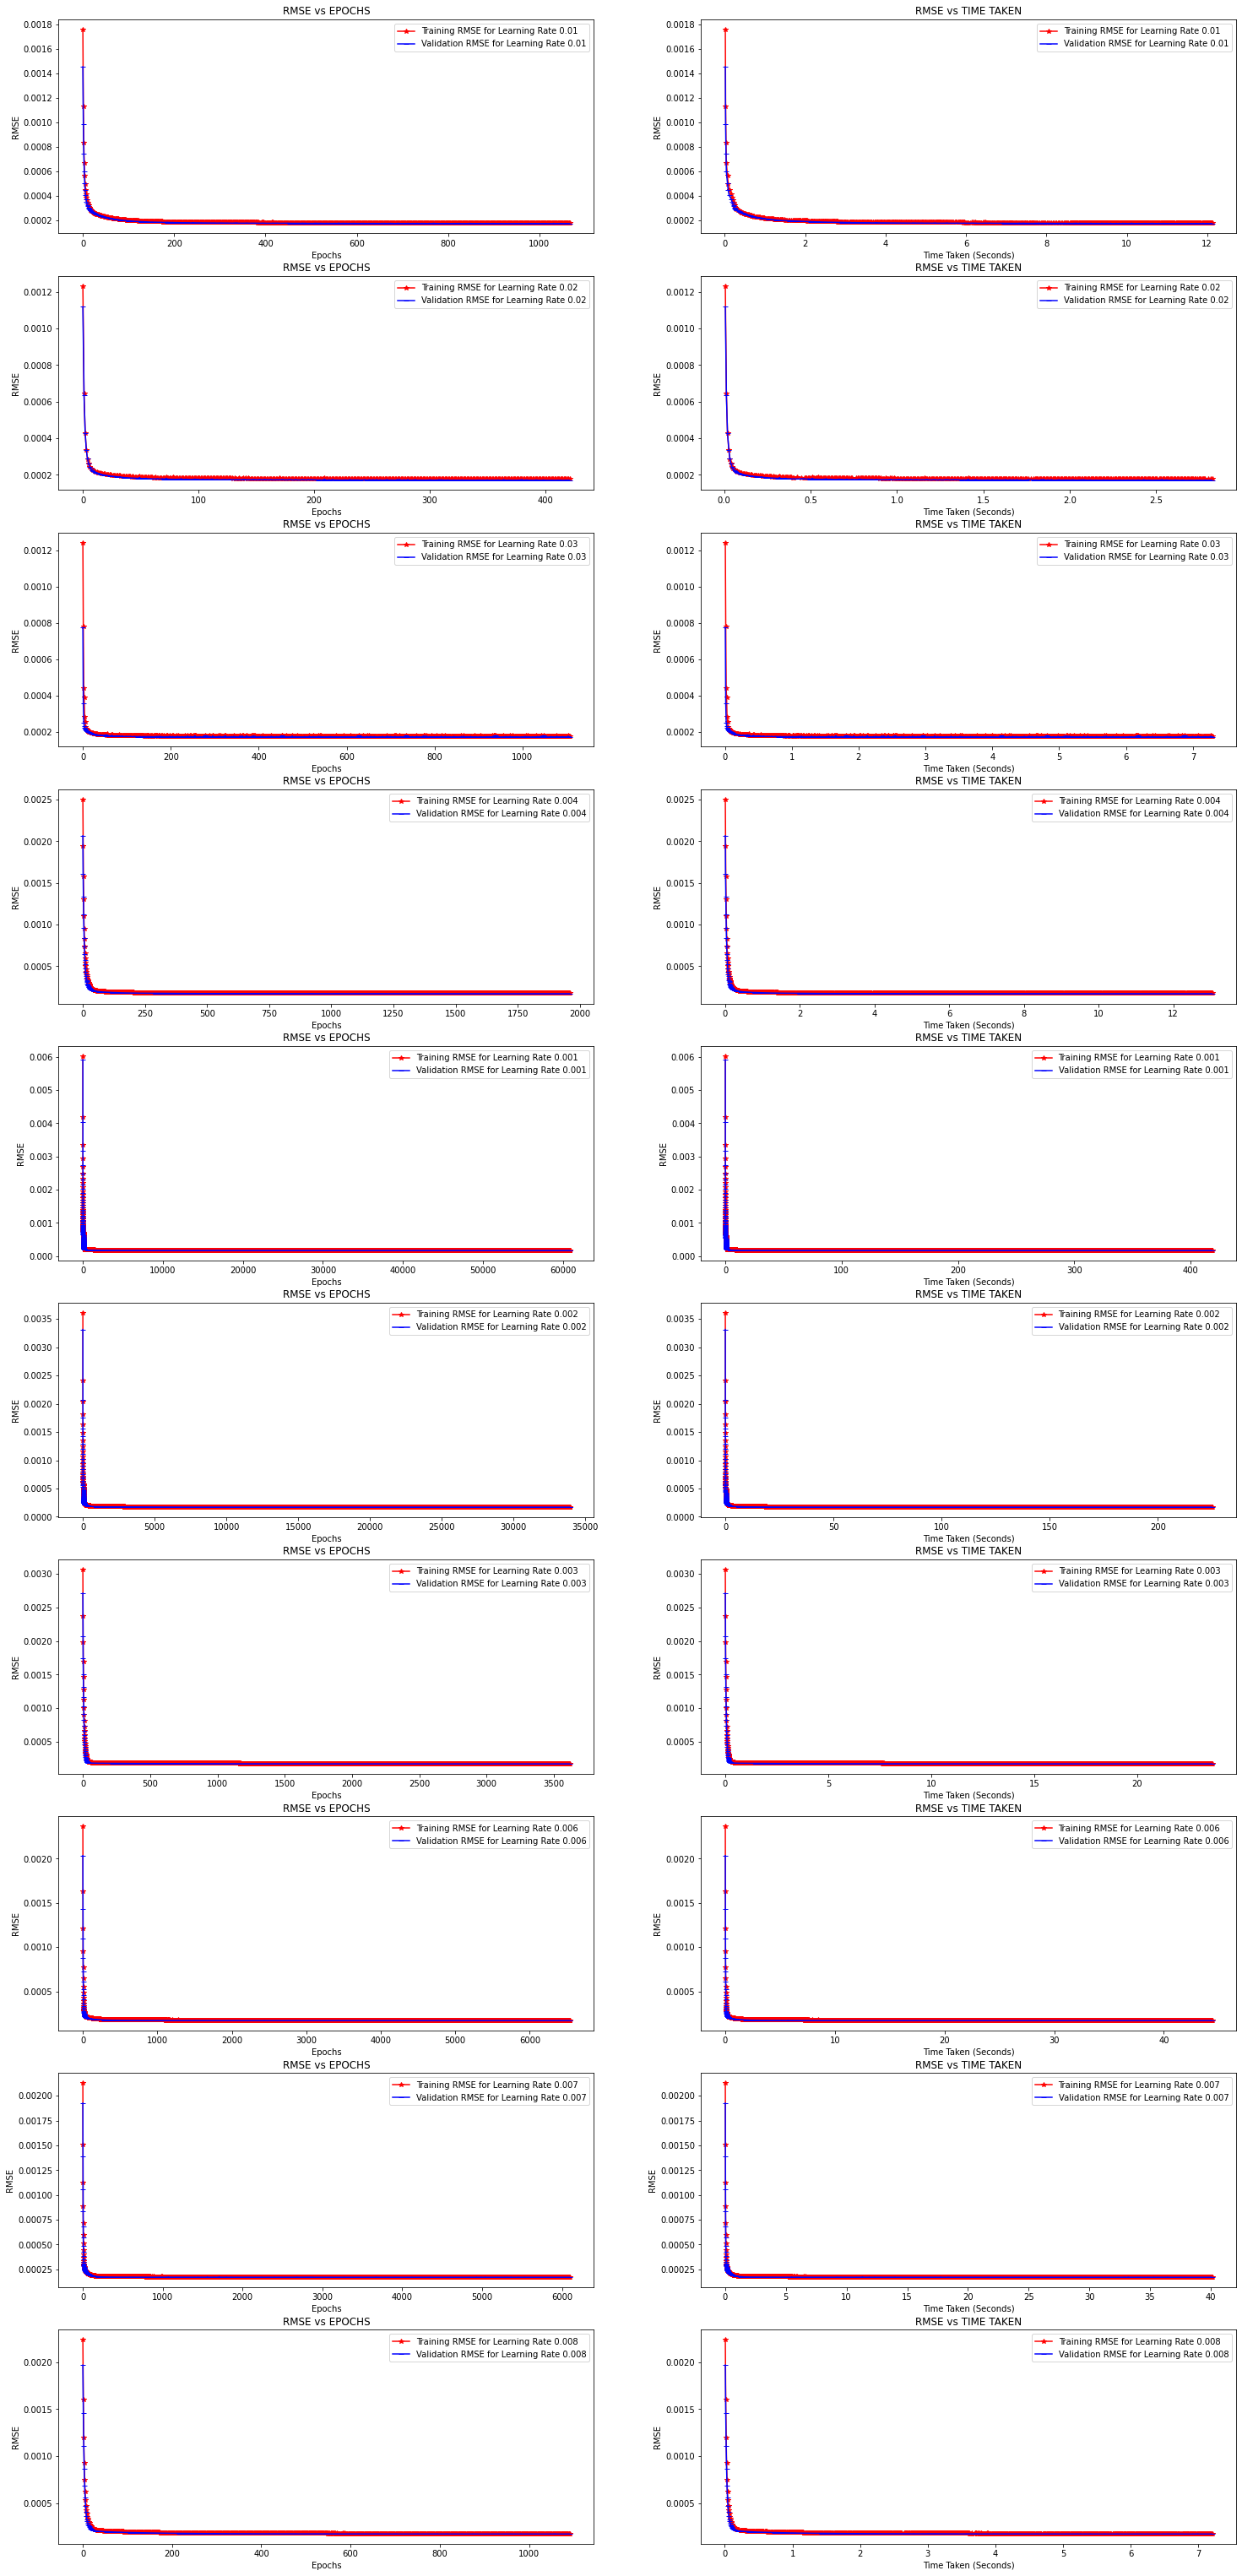

In [25]:
fig , axs = plt.subplots(10,2,figsize = (25,55))
index1=0
for LRs in Lr:
  axs[index1,0].plot(TRMSE[str(LRs)],'r',label="Training RMSE for Learning Rate "+str(LRs),marker='*')
  axs[index1,0].plot(VRMSE[str(LRs)],'b',label="Validation RMSE for Learning Rate "+str(LRs),marker='_')
  axs[index1,0].set_xlabel("Epochs")
  axs[index1,0].set_ylabel("RMSE")
  axs[index1,0].legend()
  axs[index1,0].set_title('RMSE vs EPOCHS')
  axs[index1,1].plot(TPerE[str(LRs)],TRMSE[str(LRs)],'r',label="Training RMSE for Learning Rate "+str(LRs),marker='*')
  axs[index1,1].plot(TPerE[str(LRs)],VRMSE[str(LRs)],'b',label="Validation RMSE for Learning Rate "+str(LRs),marker='_')
  axs[index1,1].set_xlabel("Time Taken (Seconds)")
  axs[index1,1].set_ylabel("RMSE")
  axs[index1,1].legend()
  axs[index1,1].set_title('RMSE vs TIME TAKEN')
  get_batches.append(batch)
  total_time.append(TIME[str(batch)][-1])
  index1+=1
plt.show()

## **In the 1st part, we see that for smaller batch sizes smaller the LR the better the convergence. When we compare the value of LR for the Part 4 where we take it as 0.01 the convergence never seems to be achieved, so taking a value lower than 0.01 makes it converge as the weights update happens significantly slower**

## **As shown in the 2nd set of plots in most cases the RMSE for training starts at a higher value than the RMSE for Validation data. The number of epochs also seem to be reducing as the LR value is increased and more epochs for lower LR values (Some cases seem to be really suprising but the pattern seems to be that the number of epochs reduce for higher Lr values)**

## Part 6 - Finalizing a model [2 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[1]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[1]** 

It takes 259 epochs to reach the convergence criteria and the RMSE is 0.0001702952886807538


Text(0.5, 1.0, 'RMSE vs TIME')

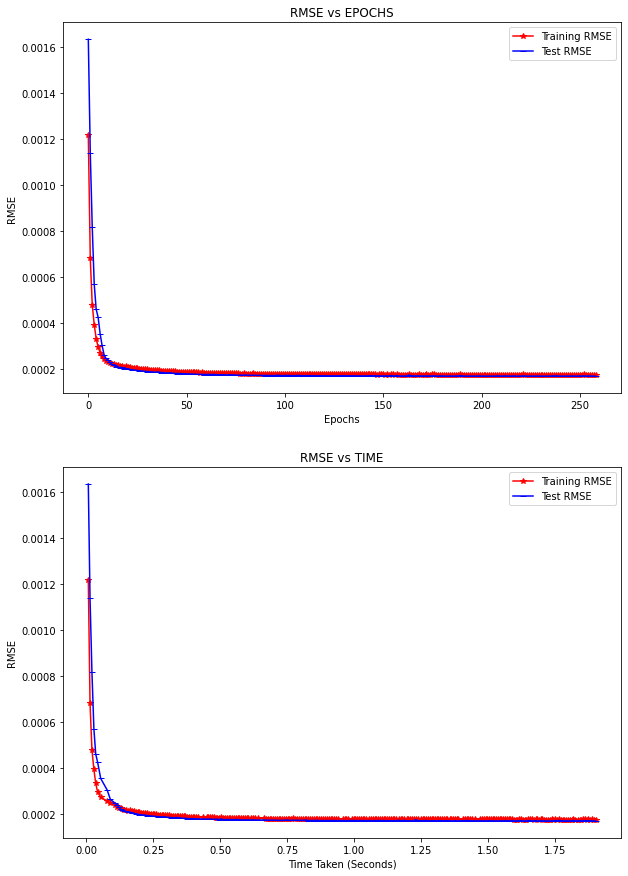

In [26]:
Fastest_Batch=get_batches[total_time.index(min(total_time))]
Lr=0.02 # from the above set of plots
Train_RMSE_MBGD,Test_RMSE_MBGD,TIME_DURATION,Final_WEIGHTS=Mini_Batch_Grad_Descent(X_std_train,Y_train,X_std_test,Y_test,Fastest_Batch,Lr,1.001*RMSE_Validation)
fig , axs = plt.subplots(2,figsize = (10,15))
axs[0].plot(Train_RMSE_MBGD,'r',label="Training RMSE",marker='*')
axs[0].plot(Test_RMSE_MBGD,'b',label="Test RMSE",marker='_')
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("RMSE")
axs[0].legend()
axs[0].set_title('RMSE vs EPOCHS')
axs[1].plot(TIME_DURATION,Train_RMSE_MBGD,'r',label="Training RMSE",marker='*')
axs[1].plot(TIME_DURATION,Test_RMSE_MBGD,'b',label="Test RMSE",marker='_')
axs[1].set_xlabel("Time Taken (Seconds)")
axs[1].set_ylabel("RMSE")
axs[1].legend()
axs[1].set_title('RMSE vs TIME') 

# **From the above set of training and validations from Part 3 to Part 4 we can say the direct method would be straight forward and hassel free if there were no constraints, but considering there are time realted and also computational constraints we would choose mini batch gradient descent with batch size that converges fastest and with a Lr that takes the least number of epochs and time to get a convergence value**

# **We shall select Lr of 0.02 and a batch size that provided fastest convergence so, that not selected by us. Its dependent on Part 4. These parameter will achieve the convergence criteria in a short period of time shall take the less number of epochs**

# **The short the time to train the better for the model as it can use that extra time at fine tuning the parameters that can help make the ailerons of the aircraft work as desired**

## Part 7 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/9rz9Cbqo to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/project4_git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/project4_git-*********
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project4_git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

Project Link

https://github.com/APS-1070-2021/project-4-jashwantrajg